### TRAINING

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\data\\processed_stroke_data.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,hypertension_heart_combo,age_squared,bmi_squared,age_original,avg_glucose_level_original,bmi_original,age_bmi_interaction_original,age_glucose_interaction_original,age_squared_original,bmi_squared_original
0,Male,1.095047,0,1,Yes,Private,Urban,1.866685,1.132303,formerly smoked,...,1,1.139888,1.088862,67.0,5.107732,36.6,2452.2,342.218028,4489.0,1339.56
1,Female,0.828761,0,0,Yes,Self-employed,Rural,1.866685,-0.092541,never smoked,...,0,0.740109,-0.202930,61.0,5.107732,27.8,1695.8,311.571637,3721.0,772.84
2,Male,1.671999,0,1,Yes,Private,Rural,0.362357,0.561637,never smoked,...,1,2.134651,0.443080,80.0,4.672081,32.5,2600.0,373.766471,6400.0,1056.25
3,Female,0.296191,0,0,Yes,Private,Urban,1.866685,0.826092,smokes,...,0,0.052989,0.732817,49.0,5.107732,34.4,1685.6,250.278856,2401.0,1183.36
4,Female,1.627618,1,0,Yes,Self-employed,Rural,1.866685,-0.621451,never smoked,...,1,2.051884,-0.651611,79.0,5.107732,24.0,1896.0,403.510809,6241.0,576.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,Female,-1.434665,0,0,No,Non_working,Urban,-1.653381,-1.122524,never smoked,...,0,-1.144787,-1.015953,10.0,4.088326,20.4,204.0,40.883265,100.0,416.16
48494,Female,0.606857,0,0,Yes,Govt_job,Urban,1.866685,2.510253,formerly smoked,...,0,0.435590,2.964117,56.0,5.107732,46.5,2604.0,286.032978,3136.0,2162.25
48495,Female,1.760760,1,0,Yes,Private,Urban,-0.121509,0.060564,formerly smoked,...,1,2.303308,-0.060763,82.0,4.531954,28.9,2369.8,371.620238,6724.0,835.21
48496,Male,-0.103238,0,0,Yes,Private,Urban,0.136831,0.659068,never smoked,...,0,-0.363968,0.547910,40.0,4.606769,33.2,1328.0,184.270756,1600.0,1102.24


In [3]:
# Hiển thị các cột có kiểu object hoặc category
cat_columns = df.select_dtypes(include=['object', 'category']).columns
print("Các cột còn dạng categorical:", list(cat_columns))

Các cột còn dạng categorical: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'bmi_category', 'glucose_category']


In [4]:
# Encode các cột phân loại
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
# Chọn features cuối cùng
final_features = [col for col in df.columns 
                    if col not in ['stroke', 'id'] and not col.endswith('_original') 
                    and col not in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
                                'age_group', 'bmi_category', 'glucose_category']]

X = df[final_features].fillna(0)
y = df['stroke']

In [6]:
print(f"✅ Dataset cuối cùng có {X.shape[0]} samples và {X.shape[1]} features")
print(f"✅ Features được sử dụng: {list(X.columns)}")

✅ Dataset cuối cùng có 48498 samples và 28 features
✅ Features được sử dụng: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'risk_score', 'gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'Residence_type_encoded', 'smoking_status_encoded', 'age_group_Child', 'age_group_Young Adult', 'age_group_Adult', 'age_group_Middle Age', 'age_group_Senior', 'bmi_category_Underweight', 'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese', 'glucose_category_Normal', 'glucose_category_Prediabetic', 'glucose_category_Diabetic', 'age_bmi_interaction', 'age_glucose_interaction', 'hypertension_heart_combo', 'age_squared', 'bmi_squared']


In [7]:
# Chia train/test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print(f"✅ Train set: {X_train.shape[0]} samples")
print(f"✅ Test set: {X_test.shape[0]} samples")

✅ Train set: 38798 samples
✅ Test set: 9700 samples


In [8]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

826
37972


In [9]:
# Tạo SMOTE sampler
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)

print("Trước SMOTE:", np.bincount(y_train))
print("Sau SMOTE:", np.bincount(y_train_bal))

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning b

Trước SMOTE: [37972   826]
Sau SMOTE: [37949 37949]


#### SVM

In [10]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_bal, y_train_bal)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.89      9494
           1       0.07      0.64      0.13       206

    accuracy                           0.81      9700
   macro avg       0.53      0.73      0.51      9700
weighted avg       0.97      0.81      0.88      9700

Confusion Matrix:
 [[7742 1752]
 [  75  131]]
ROC-AUC Score: 0.8100726877066967


#### KNN

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_bal, y_train_bal)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9494
           1       0.14      0.49      0.22       206

    accuracy                           0.92      9700
   macro avg       0.56      0.71      0.59      9700
weighted avg       0.97      0.92      0.94      9700

Confusion Matrix:
 [[8863  631]
 [ 105  101]]
ROC-AUC Score: 0.746110982715706


#### Logistic Regression

In [12]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_bal, y_train_bal)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85      9494
           1       0.07      0.84      0.12       206

    accuracy                           0.74      9700
   macro avg       0.53      0.79      0.48      9700
weighted avg       0.98      0.74      0.83      9700

Confusion Matrix:
 [[7005 2489]
 [  32  174]]
ROC-AUC Score: 0.8516922287147118


#### Random Forest

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9494
           1       0.46      0.37      0.41       206

    accuracy                           0.98      9700
   macro avg       0.72      0.68      0.70      9700
weighted avg       0.98      0.98      0.98      9700

Confusion Matrix:
 [[9405   89]
 [ 130   76]]
ROC-AUC Score: 0.8750925469535179


#### Decision Tree

In [14]:
dt_model = DecisionTreeClassifier(
    class_weight='balanced',  # 👉 giống scale_pos_weight
    max_depth=5,              # hạn chế overfitting
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(X_train_bal, y_train_bal)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt =  dt_model.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.86      9494
           1       0.06      0.72      0.11       206

    accuracy                           0.75      9700
   macro avg       0.53      0.74      0.48      9700
weighted avg       0.97      0.75      0.84      9700

Confusion Matrix:
 [[7161 2333]
 [  58  148]]
ROC-AUC Score: 0.8154457797566577


#### XGBoost

In [15]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9494
           1       0.26      0.17      0.20       206

    accuracy                           0.97      9700
   macro avg       0.62      0.58      0.59      9700
weighted avg       0.97      0.97      0.97      9700

Confusion Matrix:
 [[9397   97]
 [ 172   34]]
ROC-AUC Score: 0.8508429442407162


#### Stacking

In [16]:
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(kernel='rbf', probability=True))
]
meta_learner = LogisticRegression()
stack_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner)
stack_model.fit(X_train_bal, y_train_bal)
y_pred_stack = stack_model.predict(X_test)
y_prob_stack = stack_model.predict_proba(X_test)[:, 1]
print("Stacking Classification Report:")
print(classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_stack))

Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9494
           1       0.50      0.35      0.41       206

    accuracy                           0.98      9700
   macro avg       0.74      0.67      0.70      9700
weighted avg       0.98      0.98      0.98      9700

Confusion Matrix:
 [[9422   72]
 [ 134   72]]
ROC-AUC Score: 0.8171502287597072


#### ROC Curve

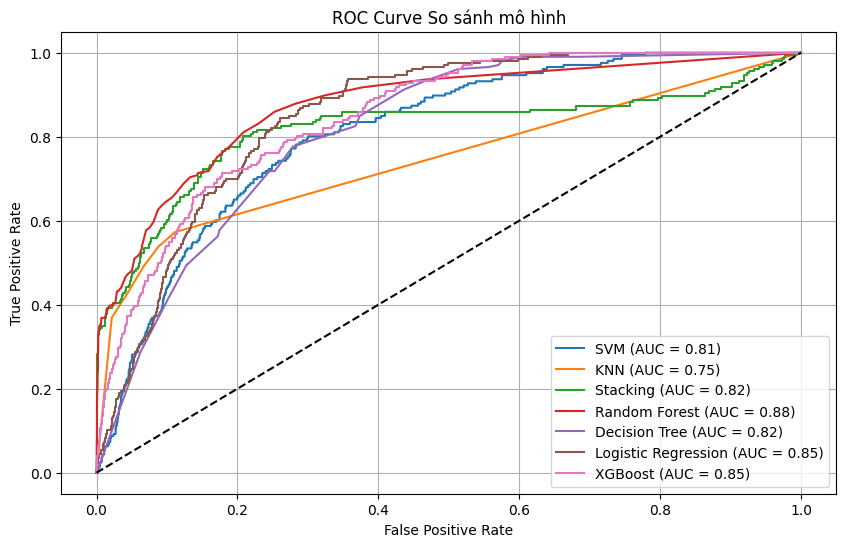

In [17]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve So sánh mô hình")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

models = {
    "SVM": svm_model,
    "KNN": knn_model,
    "Stacking": stack_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model,
    "XGBoost": xgb_model
}
plot_roc_curves(models, X_test, y_test)

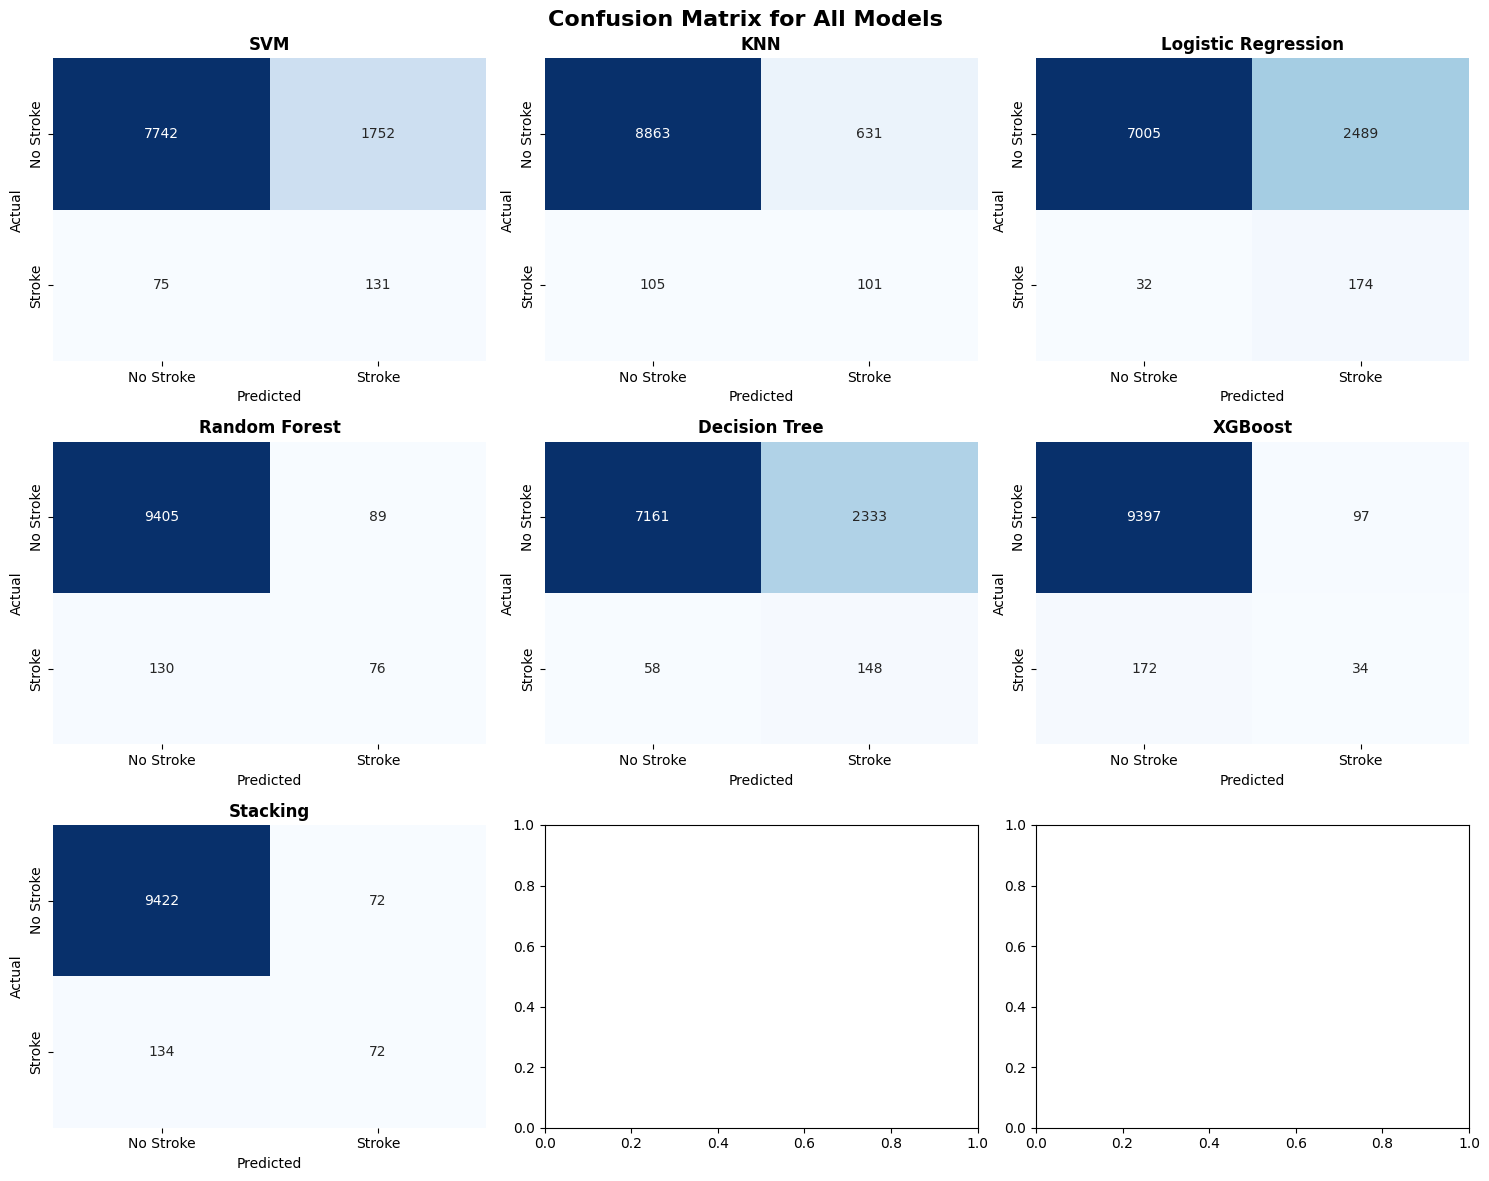


COMPARISON TABLE - ALL MODELS
Model                Accuracy   Precision  Recall     F1-Score   Specificity
--------------------------------------------------------------------------------
SVM                  0.8116     0.0696     0.6359     0.1254     0.8155    
KNN                  0.9241     0.1380     0.4903     0.2154     0.9335    
Logistic Regression  0.7401     0.0653     0.8447     0.1213     0.7378    
Random Forest        0.9774     0.4606     0.3689     0.4097     0.9906    
Decision Tree        0.7535     0.0597     0.7184     0.1102     0.7543    
XGBoost              0.9723     0.2595     0.1650     0.2018     0.9898    
Stacking             0.9788     0.5000     0.3495     0.4114     0.9924    


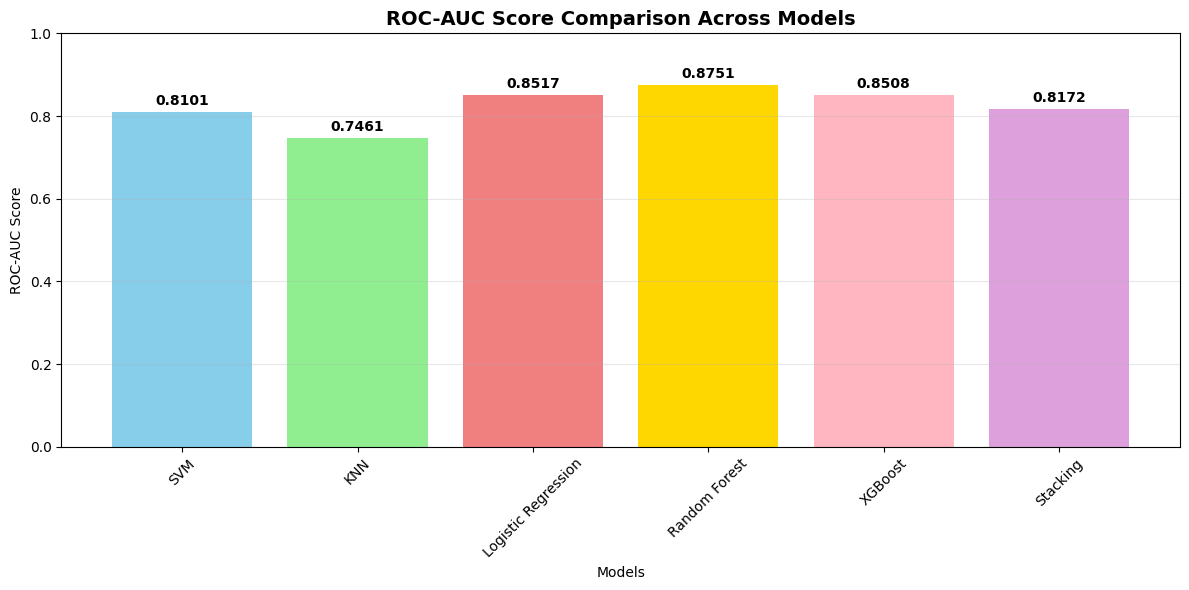

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tạo figure với 6 subplots (2 hàng, 3 cột)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Confusion Matrix for All Models', fontsize=16, fontweight='bold')

# Danh sách các models và predictions
models = [
    ('SVM', y_pred_svm),
    ('KNN', y_pred_knn), 
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('Decision Tree', y_pred_dt),
    ('XGBoost', y_pred_xgb),
    ('Stacking', y_pred_stack)
]

# Vẽ confusion matrix cho từng model
for i, (model_name, y_pred) in enumerate(models):
    row = i // 3
    col = i % 3
    
    # Tính confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Vẽ heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                ax=axes[row, col], cbar=False,
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    
    axes[row, col].set_title(f'{model_name}', fontweight='bold')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# Tạo bảng so sánh metrics
print("\n" + "="*80)
print("COMPARISON TABLE - ALL MODELS")
print("="*80)

metrics_data = []
for model_name, y_pred in models:
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    metrics_data.append([model_name, accuracy, precision, recall, f1, specificity])

# In bảng
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Specificity':<10}")
print("-" * 80)
for row in metrics_data:
    print(f"{row[0]:<20} {row[1]:<10.4f} {row[2]:<10.4f} {row[3]:<10.4f} {row[4]:<10.4f} {row[5]:<10.4f}")

# Vẽ biểu đồ so sánh ROC-AUC scores
models_roc = [
    ('SVM', roc_auc_score(y_test, y_prob_svm)),
    ('KNN', roc_auc_score(y_test, y_prob_knn)),
    ('Logistic Regression', roc_auc_score(y_test, y_prob_lr)),
    ('Random Forest', roc_auc_score(y_test, y_prob_rf)),
    ('XGBoost', roc_auc_score(y_test, y_prob_xgb)),
    ('Stacking', roc_auc_score(y_test, y_prob_stack))
]

plt.figure(figsize=(12, 6))
model_names = [item[0] for item in models_roc]
roc_scores = [item[1] for item in models_roc]

bars = plt.bar(model_names, roc_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'plum'])
plt.title('ROC-AUC Score Comparison Across Models', fontsize=14, fontweight='bold')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Models')
plt.ylim(0, 1)

# Thêm giá trị trên mỗi cột
for bar, score in zip(bars, roc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Feature Importance Analysis for Stacking Model
from sklearn.inspection import permutation_importance
import seaborn as sns

# 1. Feature Importance từ Base Models
print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS FOR STACKING MODEL")
print("=" * 60)

# Lấy tên các features
feature_names = [
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'risk_score',
    'gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'Residence_type_encoded',
    'smoking_status_encoded', 'age_group_Child', 'age_group_Young Adult', 'age_group_Adult',
    'age_group_Middle Age', 'age_group_Senior', 'bmi_category_Underweight', 'bmi_category_Normal',
    'bmi_category_Overweight', 'bmi_category_Obese', 'glucose_category_Normal', 'glucose_category_Prediabetic',
    'glucose_category_Diabetic', 'age_bmi_interaction', 'age_glucose_interaction', 'hypertension_heart_combo',
    'age_squared', 'bmi_squared'
]

# A. Random Forest Feature Importance
rf_importance = rf_model.feature_importances_
rf_feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_importance
}).sort_values('importance', ascending=False)

print("\n1. RANDOM FOREST FEATURE IMPORTANCE (Top 10):")
print("-" * 50)
for i, (_, row) in enumerate(rf_feature_df.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} : {row['importance']:.4f}")

# B. XGBoost Feature Importance
xgb_importance = xgb_model.feature_importances_
xgb_feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_importance
}).sort_values('importance', ascending=False)

print("\n2. XGBOOST FEATURE IMPORTANCE (Top 10):")
print("-" * 50)
for i, (_, row) in enumerate(xgb_feature_df.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} : {row['importance']:.4f}")

# 2. Permutation Importance cho toàn bộ Stacking Model
print("\n3. PERMUTATION IMPORTANCE FOR STACKING MODEL:")
print("-" * 50)
print("Đang tính toán permutation importance...")

# Tính permutation importance (có thể mất thời gian)
perm_importance = permutation_importance(
    stack_model, X_test, y_test, 
    n_repeats=5, random_state=42, scoring='roc_auc'
)

# Tạo DataFrame cho permutation importance
perm_feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\nPERMUTATION IMPORTANCE (Top 10):")
for i, (_, row) in enumerate(perm_feature_df.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} : {row['importance_mean']:.4f} (±{row['importance_std']:.4f})")

# 3. Feature Importance từ Meta-learner (Logistic Regression)
print("\n4. META-LEARNER (LOGISTIC REGRESSION) COEFFICIENTS:")
print("-" * 50)
# Lấy coefficients từ meta-learner
meta_coef = stack_model.final_estimator_.coef_[0]
base_model_names = ['Random Forest', 'KNN', 'SVM']

print("Base Model Contributions:")
for i, (name, coef) in enumerate(zip(base_model_names, meta_coef)):
    print(f"{i+1}. {name:<15} : {coef:.4f}")

# 4. Tổng hợp Feature Importance
print("\n5. COMPREHENSIVE FEATURE IMPORTANCE SUMMARY:")
print("-" * 50)

# Kết hợp importance từ các nguồn khác nhau
combined_importance = pd.DataFrame({
    'feature': feature_names,
    'rf_importance': rf_importance,
    'xgb_importance': xgb_importance,
    'perm_importance': perm_importance.importances_mean
})

# Tính trung bình có trọng số
combined_importance['combined_score'] = (
    0.4 * combined_importance['rf_importance'] + 
    0.3 * combined_importance['xgb_importance'] + 
    0.3 * combined_importance['perm_importance']
)

combined_importance = combined_importance.sort_values('combined_score', ascending=False)

print("COMBINED FEATURE IMPORTANCE (Top 15):")
for i, (_, row) in enumerate(combined_importance.head(15).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} : {row['combined_score']:.4f}")

# 5. Phân tích theo nhóm features
print("\n6. FEATURE IMPORTANCE BY CATEGORY:")
print("-" * 50)

# Nhóm các features
feature_categories = {
    'Basic Demographics': ['age', 'gender_encoded'],
    'Medical History': ['hypertension', 'heart_disease', 'hypertension_heart_combo'],
    'Lifestyle': ['smoking_status_encoded', 'ever_married_encoded', 'work_type_encoded', 'Residence_type_encoded'],
    'Health Metrics': ['avg_glucose_level', 'bmi', 'risk_score'],
    'Age Groups': [f for f in feature_names if 'age_group_' in f],
    'BMI Categories': [f for f in feature_names if 'bmi_category_' in f],
    'Glucose Categories': [f for f in feature_names if 'glucose_category_' in f],
    'Interaction Terms': ['age_bmi_interaction', 'age_glucose_interaction', 'age_squared', 'bmi_squared']
}

category_importance = {}
for category, features in feature_categories.items():
    category_features = [f for f in features if f in feature_names]
    if category_features:
        category_score = combined_importance[
            combined_importance['feature'].isin(category_features)
        ]['combined_score'].sum()
        category_importance[category] = category_score

# Sắp xếp theo importance
sorted_categories = sorted(category_importance.items(), key=lambda x: x[1], reverse=True)

for i, (category, score) in enumerate(sorted_categories):
    print(f"{i+1}. {category:<20} : {score:.4f}")

# 6. Recommendations
print("\n7. FEATURE IMPORTANCE INSIGHTS:")
print("-" * 50)

top_features = combined_importance.head(10)['feature'].tolist()
print("🔍 TOP 10 MOST IMPORTANT FEATURES:")
for i, feature in enumerate(top_features):
    print(f"   {i+1}. {feature}")

FEATURE IMPORTANCE ANALYSIS FOR STACKING MODEL

1. RANDOM FOREST FEATURE IMPORTANCE (Top 10):
--------------------------------------------------
 1. age_squared               : 0.1459
 2. age                       : 0.1238
 3. age_glucose_interaction   : 0.1071
 4. age_bmi_interaction       : 0.0810
 5. smoking_status_encoded    : 0.0612
 6. work_type_encoded         : 0.0555
 7. avg_glucose_level         : 0.0500
 8. bmi_squared               : 0.0475
 9. bmi                       : 0.0474
10. age_group_Senior          : 0.0420

2. XGBOOST FEATURE IMPORTANCE (Top 10):
--------------------------------------------------
 1. age_squared               : 0.1355
 2. age                       : 0.1057
 3. glucose_category_Diabetic : 0.0899
 4. Residence_type_encoded    : 0.0777
 5. smoking_status_encoded    : 0.0720
 6. work_type_encoded         : 0.0694
 7. gender_encoded            : 0.0633
 8. bmi_category_Overweight   : 0.0579
 9. ever_married_encoded      : 0.0573
10. age_group_Adult   

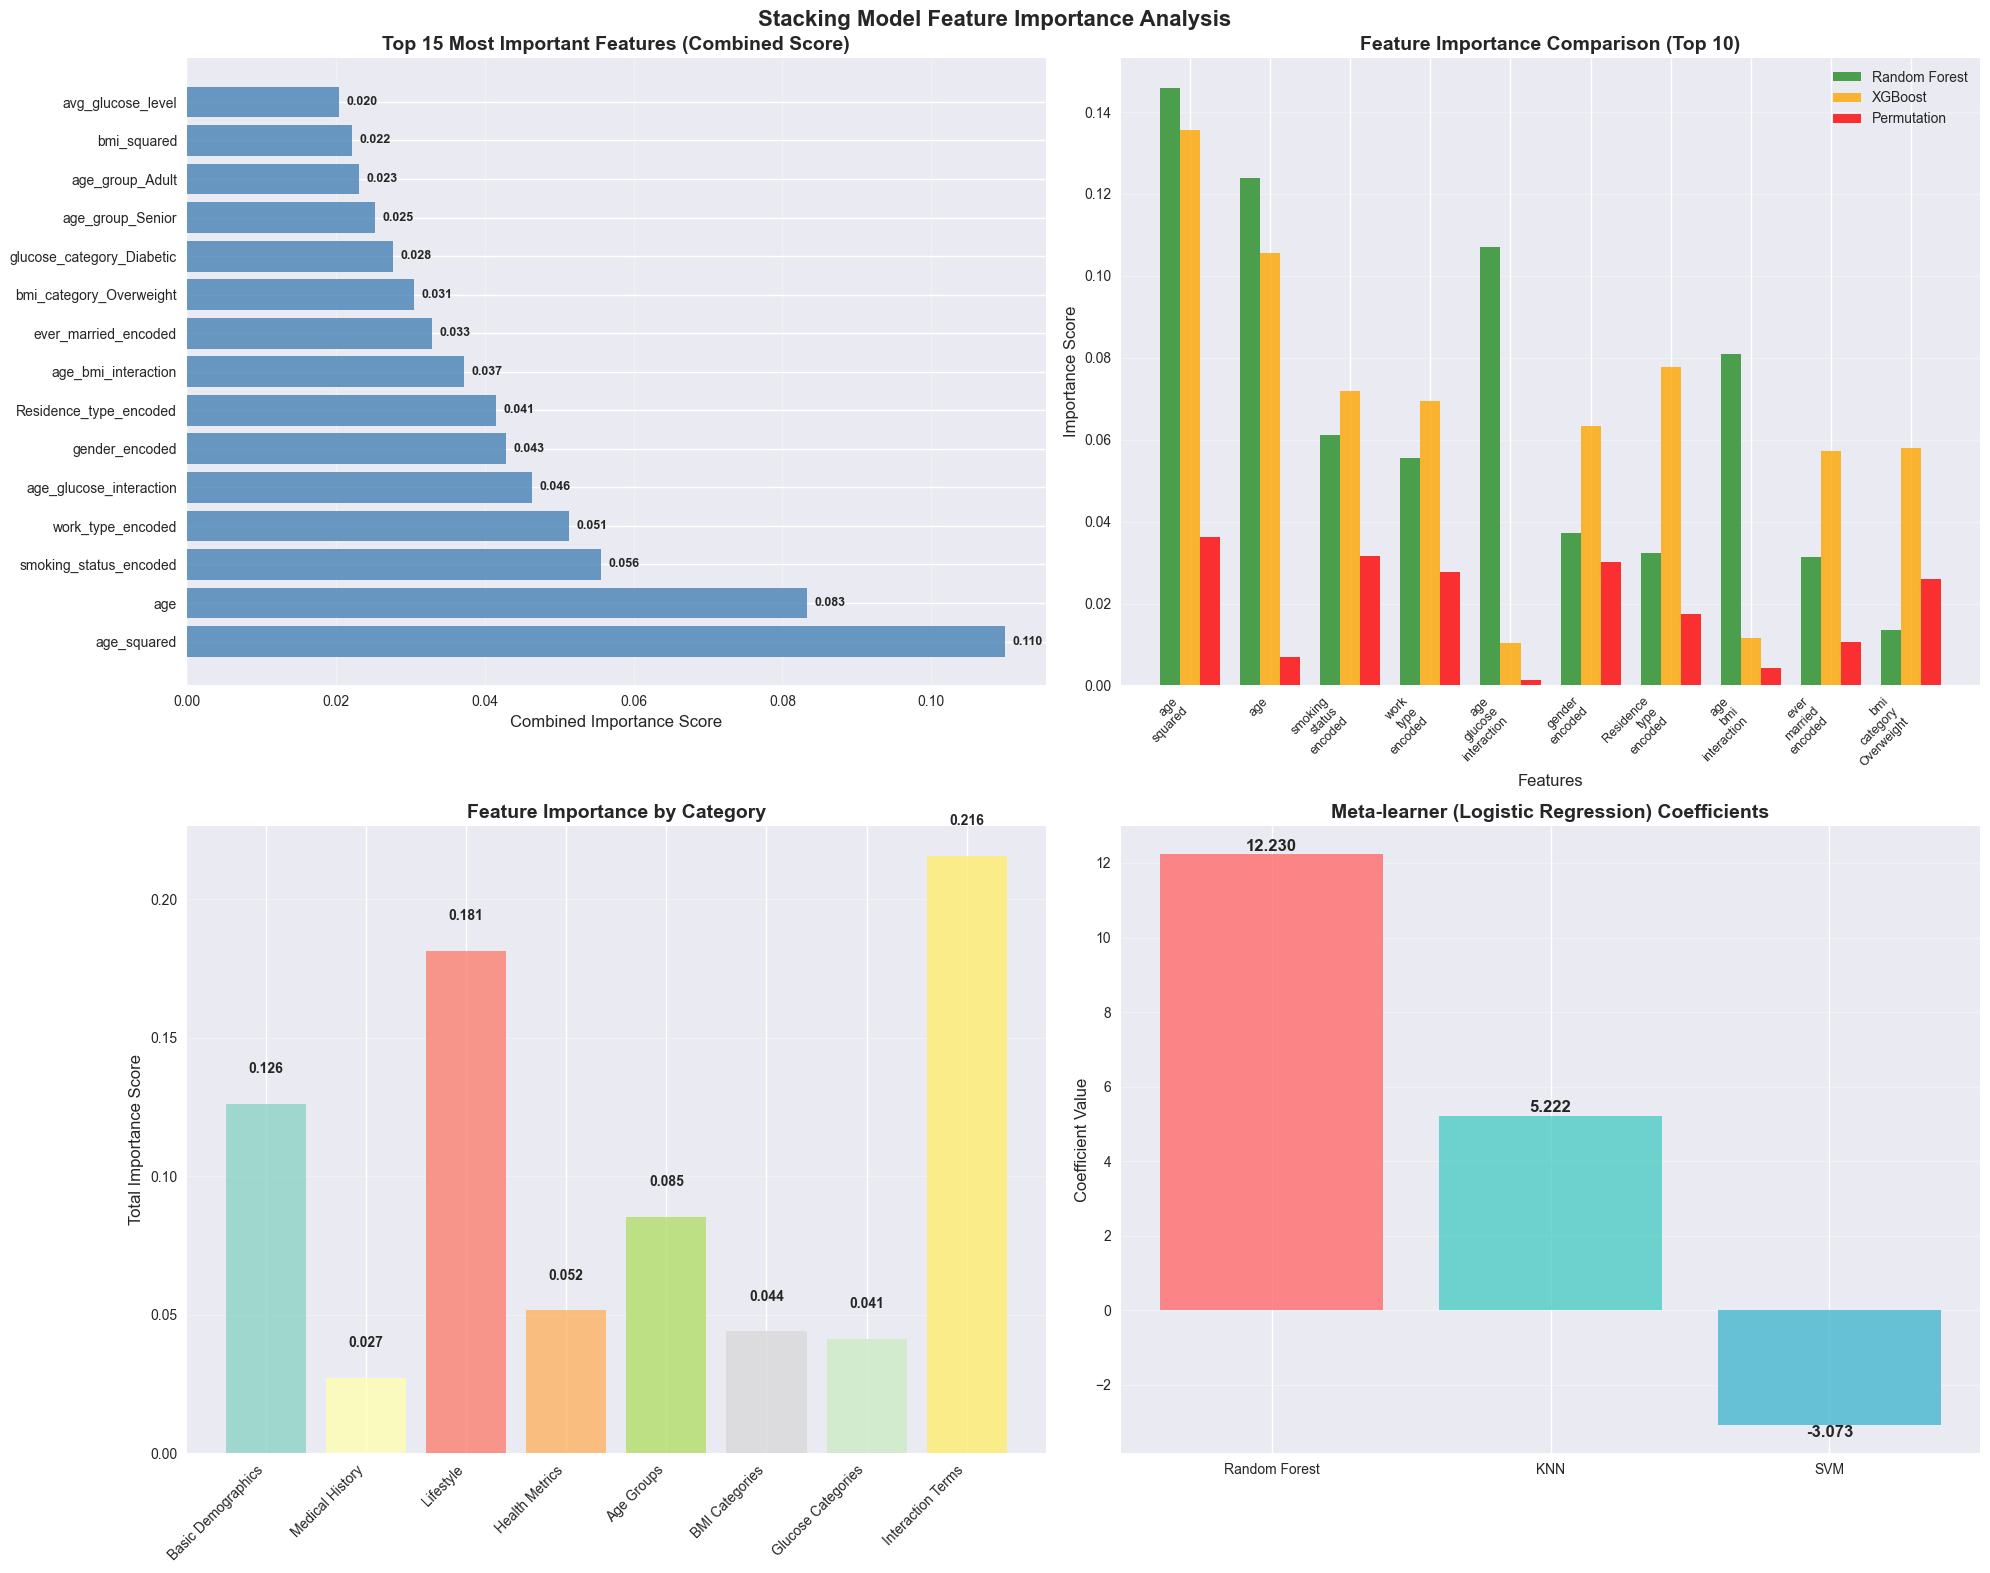


8. FEATURE CORRELATION WITH TARGET (STROKE):
--------------------------------------------------
TOP 10 FEATURES BY CORRELATION WITH TARGET:
 1. age_squared               : 0.1880
 2. age_group_Senior          : 0.1774
 3. age_glucose_interaction   : 0.1749
 4. age                       : 0.1671
 5. risk_score                : 0.1604
 6. age_bmi_interaction       : 0.1579
 7. hypertension_heart_combo  : 0.1335
 8. heart_disease             : 0.1217
 9. glucose_category_Diabetic : 0.0992
10. hypertension              : 0.0865


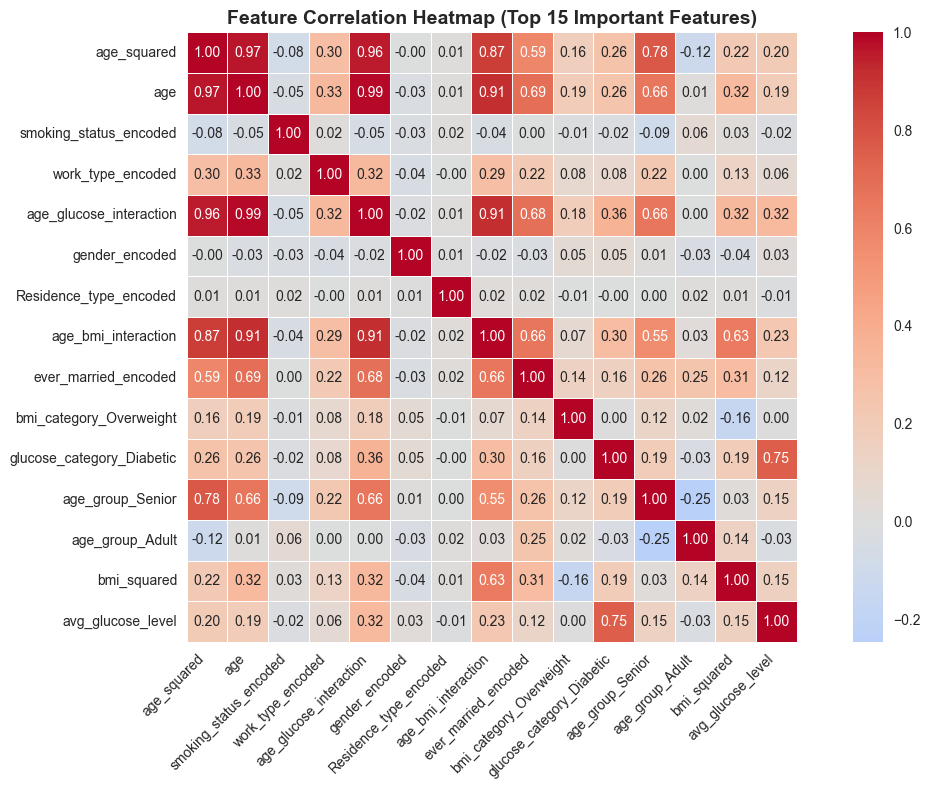


9. FEATURE IMPORTANCE STATISTICS:
--------------------------------------------------
Total number of features: 28
Top 5 features contribute: 34.6% of total importance
Top 10 features contribute: 53.2% of total importance
Most important feature: age_squared
Least important feature: bmi_category_Underweight

10. FEATURE SELECTION RECOMMENDATIONS:
--------------------------------------------------
🎯 TIER 1 (Must-have features):
   1. age_squared
   2. age
   3. smoking_status_encoded
   4. work_type_encoded
   5. age_glucose_interaction
   6. gender_encoded
   7. Residence_type_encoded
   8. age_bmi_interaction

🎯 TIER 2 (Important features):
   1. ever_married_encoded
   2. bmi_category_Overweight
   3. glucose_category_Diabetic
   4. age_group_Senior
   5. age_group_Adult
   6. bmi_squared
   7. avg_glucose_level

🎯 TIER 3 (Consider for removal):
   1. bmi_category_Obese
   2. hypertension
   3. bmi_category_Normal
   4. glucose_category_Normal
   5. bmi_category_Underweight


In [20]:
# Feature Importance Visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Stacking Model Feature Importance Analysis', fontsize=16, fontweight='bold')

# 1. Combined Feature Importance (Top 15)
ax1 = axes[0, 0]
top_15 = combined_importance.head(15)
bars1 = ax1.barh(range(len(top_15)), top_15['combined_score'], color='steelblue', alpha=0.8)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['feature'], fontsize=10)
ax1.set_xlabel('Combined Importance Score', fontsize=12)
ax1.set_title('Top 15 Most Important Features (Combined Score)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars1, top_15['combined_score'])):
    ax1.text(value + 0.001, i, f'{value:.3f}', 
             va='center', ha='left', fontsize=9, fontweight='bold')

# 2. Comparison of Different Importance Methods
ax2 = axes[0, 1]
top_10_features = combined_importance.head(10)['feature'].tolist()
comparison_data = combined_importance[combined_importance['feature'].isin(top_10_features)]

x = np.arange(len(top_10_features))
width = 0.25

bars1 = ax2.bar(x - width, comparison_data['rf_importance'], width, 
                label='Random Forest', alpha=0.8, color='forestgreen')
bars2 = ax2.bar(x, comparison_data['xgb_importance'], width, 
                label='XGBoost', alpha=0.8, color='orange')
bars3 = ax2.bar(x + width, comparison_data['perm_importance'], width, 
                label='Permutation', alpha=0.8, color='red')

ax2.set_xlabel('Features', fontsize=12)
ax2.set_ylabel('Importance Score', fontsize=12)
ax2.set_title('Feature Importance Comparison (Top 10)', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f.replace('_', '\n') for f in top_10_features], 
                    rotation=45, ha='right', fontsize=9)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Feature Categories Importance
ax3 = axes[1, 0]
categories = list(category_importance.keys())
scores = list(category_importance.values())

colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
bars3 = ax3.bar(range(len(categories)), scores, color=colors, alpha=0.8)
ax3.set_xticks(range(len(categories)))
ax3.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax3.set_ylabel('Total Importance Score', fontsize=12)
ax3.set_title('Feature Importance by Category', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars3, scores)):
    ax3.text(i, value + 0.01, f'{value:.3f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Meta-learner Coefficients
ax4 = axes[1, 1]
base_models = ['Random Forest', 'KNN', 'SVM']
coefficients = meta_coef

colors_meta = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars4 = ax4.bar(base_models, coefficients, color=colors_meta, alpha=0.8)
ax4.set_ylabel('Coefficient Value', fontsize=12)
ax4.set_title('Meta-learner (Logistic Regression) Coefficients', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars4, coefficients)):
    ax4.text(i, value + (0.01 if value > 0 else -0.01), f'{value:.3f}', 
             ha='center', va='bottom' if value > 0 else 'top', 
             fontsize=12, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Additional Analysis: Feature Correlation with Target
print("\n8. FEATURE CORRELATION WITH TARGET (STROKE):")
print("-" * 50)

# Calculate correlation between features and target
feature_target_corr = []
for i, feature in enumerate(feature_names):
    corr = np.corrcoef(X_test[:, i], y_test)[0, 1]
    feature_target_corr.append(abs(corr))  # Use absolute correlation

corr_df = pd.DataFrame({
    'feature': feature_names,
    'correlation': feature_target_corr
}).sort_values('correlation', ascending=False)

print("TOP 10 FEATURES BY CORRELATION WITH TARGET:")
for i, (_, row) in enumerate(corr_df.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} : {row['correlation']:.4f}")

# Create a heatmap for top features
plt.figure(figsize=(12, 8))
top_features_for_heatmap = combined_importance.head(15)['feature'].tolist()
feature_indices = [feature_names.index(f) for f in top_features_for_heatmap]

# Create correlation matrix for top features
top_features_data = X_test[:, feature_indices]
corr_matrix = np.corrcoef(top_features_data.T)

sns.heatmap(corr_matrix, 
            xticklabels=top_features_for_heatmap,
            yticklabels=top_features_for_heatmap,
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap (Top 15 Important Features)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Summary Statistics
print("\n9. FEATURE IMPORTANCE STATISTICS:")
print("-" * 50)
print(f"Total number of features: {len(feature_names)}")
print(f"Top 5 features contribute: {combined_importance.head(5)['combined_score'].sum():.1%} of total importance")
print(f"Top 10 features contribute: {combined_importance.head(10)['combined_score'].sum():.1%} of total importance")
print(f"Most important feature: {combined_importance.iloc[0]['feature']}")
print(f"Least important feature: {combined_importance.iloc[-1]['feature']}")

# Feature selection recommendation
print("\n10. FEATURE SELECTION RECOMMENDATIONS:")
print("-" * 50)
print("🎯 TIER 1 (Must-have features):")
tier1 = combined_importance.head(8)['feature'].tolist()
for i, feature in enumerate(tier1):
    print(f"   {i+1}. {feature}")

print("\n🎯 TIER 2 (Important features):")
tier2 = combined_importance.iloc[8:15]['feature'].tolist()
for i, feature in enumerate(tier2):
    print(f"   {i+1}. {feature}")

print("\n🎯 TIER 3 (Consider for removal):")
tier3 = combined_importance.tail(5)['feature'].tolist()
for i, feature in enumerate(tier3):
    print(f"   {i+1}. {feature}")

#### Saving models path

In [21]:
import joblib
import os
import json

# Tạo thư mục lưu model nếu chưa có
os.makedirs("models", exist_ok=True)

# Giả định scaler và encoders đã được dùng từ trước
# Nếu bạn dùng LabelEncoder trong encode, thêm nó vào dict này
model_scaler = scaler
label_encoders = {
    'gender': LabelEncoder().fit(['Male', 'Female']),
    'ever_married': LabelEncoder().fit(['Yes', 'No']),
    'work_type': LabelEncoder().fit(['Private', 'Self-employed', 'Govt_job', 'Non_working']),
    'Residence_type': LabelEncoder().fit(['Urban', 'Rural']),
    'smoking_status': LabelEncoder().fit(['never smoked', 'formerly smoked', 'smokes', 'Unknown'])
}
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

# Lưu từng model
joblib.dump({'model': svm_model, 'scaler': model_scaler, 'label_encoders': label_encoders, 'feature_names': feature_names}, 'models/svm_model.pkl')
joblib.dump({'model': knn_model, 'scaler': model_scaler, 'label_encoders': label_encoders, 'feature_names': feature_names}, 'models/knn_model.pkl')
joblib.dump({'model': stack_model, 'scaler': model_scaler, 'label_encoders': label_encoders, 'feature_names': feature_names}, 'models/stacking_model.pkl')
joblib.dump({'model': rf_model, 'scaler':model_scaler, 'label_encoders': label_encoders, 'feature_names':feature_names}, 'models/rf_model.pkl')
joblib.dump({'model': lr_model, 'scaler':model_scaler, 'label_encoders': label_encoders, 'feature_names': feature_names}, 'models/lr_model.pkl')
joblib.dump({'model': xgb_model, 'scaler':model_scaler, 'label_encoders': label_encoders, 'feature_names': feature_names}, 'models/xgb_model.pkl')
# Lưu thông tin đường dẫn model vào file json
"""
model_info = {
    "models": {
        "SVM": {
            "file_path": "models/svm_model.pkl"
        },
        "KNN": {
            "file_path": "models/knn_model.pkl"
        },
        "Stacking": {
            "file_path": "models/stacking_model.pkl"
        },
        "Logistic Regression": {
            "file_path": "models/lr_model.pkl"
        },
        "Random Forest": {
            "file_path": "models/rf_model.pkl"
        },
        "XGBoost": {
            "file_path": "models/xgb_model.pkl"
        }
    },
    "best_model": "Stacking"
}

with open("models/path_models.json", "w") as f:
    json.dump(model_info, f, indent=4)
"""

'\nmodel_info = {\n    "models": {\n        "SVM": {\n            "file_path": "models/svm_model.pkl"\n        },\n        "KNN": {\n            "file_path": "models/knn_model.pkl"\n        },\n        "Stacking": {\n            "file_path": "models/stacking_model.pkl"\n        },\n        "Logistic Regression": {\n            "file_path": "models/lr_model.pkl"\n        },\n        "Random Forest": {\n            "file_path": "models/rf_model.pkl"\n        },\n        "XGBoost": {\n            "file_path": "models/xgb_model.pkl"\n        }\n    },\n    "best_model": "Stacking"\n}\n\nwith open("models/path_models.json", "w") as f:\n    json.dump(model_info, f, indent=4)\n'

In [22]:
# Path to model
model_files = {
    'KNN': 'D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\models\\knn_model.pkl',
    'SVM': 'D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\models\\svm_model.pkl',
    'Stacking': 'D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\models\\stacking_model.pkl',
    'Random Forest': 'D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\models\\rf_model.pkl',
    'Logistic Regression': 'D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\models\\lr_model.pkl',
    'XGBoost': 'D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\models\\xgb_model.pkl',
}


comparison_results = {'models': {}}

best_auc = 0
best_model_name = None
best_model_instance = None

# ✅ Lặp qua từng mô hình đã lưu
for model_name, path in model_files.items():
    print(f"📦 Loading model: {model_name}")
    
    loaded = joblib.load(path)

    # Nếu bạn lưu cả dict (model + scaler), trích xuất ra
    if isinstance(loaded, dict):
        model = loaded['model']
        scaler = loaded.get('scaler')
        label_encoders = loaded.get('label_encoders', None)
        feature_names = loaded.get('feature_names', None)
    else:
        model = loaded  # chỉ model

    # ✅ Tiền xử lý nếu cần (giả sử bạn đã xử lý xong và có X_test, y_test)
    X_test_scaled = scaler.transform(X_test)

    # Dự đoán
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)

    # Tính metric
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'auc_roc': roc_auc_score(y_test, y_proba),
        'training_time': "Already trained",  # optional placeholder
        'file_path': path
    }

    comparison_results['models'][model_name] = metrics

    # Chọn mô hình tốt nhất theo AUC
    if metrics['auc_roc'] > best_auc:
        best_auc = metrics['auc_roc']
        best_model_name = model_name
        best_model_instance = model

# ✅ Ghi tên mô hình tốt nhất
comparison_results['best_model'] = best_model_name

# ✅ Nếu mô hình có feature importance
if hasattr(best_model_instance, 'feature_importances_'):
    fi = dict(zip(feature_names, best_model_instance.feature_importances_.tolist()))
else:
    fi = {}

comparison_results['feature_importance'] = fi

# ✅ Lưu kết quả vào JSON
with open('D:\\DS102\\DoAnDS102\\Stroke_prediction_DS102\\models\\model_comparison.json', 'w') as f:
    json.dump(comparison_results, f, indent=4)

print(f"✅ Đã lưu model_comparison.json. Best model: {best_model_name}")


📦 Loading model: KNN


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


📦 Loading model: SVM


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


📦 Loading model: Stacking
📦 Loading model: Random Forest


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


📦 Loading model: Logistic Regression
📦 Loading model: XGBoost
✅ Đã lưu model_comparison.json. Best model: Logistic Regression


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
